# Quick and Dirty Digital Currency Comparison <html>&ndash;</html> Ethereum and Bitcoin

## Question: How have the closing prices in Ethereum and Bitcoin changed together?

My hypothesis here is that they, at least recently, have been more or less moving up and down together, albeit with some time lag. If the visualization bears this out, then a possible explanation is that changes in Bitcoin drive changes in Litecoin, given the large differences in volume of coins and pricing per coin. Thus, I expect to see that LTC is more or less follows BTC up and down, though I think it is beyond my ability to prove this versus a contra-hypothesis (i.e., that LTC drives BTC up and down).

In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import requests

from bs4 import BeautifulSoup

%matplotlib inline

NOW = str(datetime.datetime.now().date())

In [18]:
NOW = NOW.split('-')
NOW = ''.join(NOW)

'20180507'

In [19]:
r = requests.get("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20170101&end={}".format(NOW))
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.table
columns = [th.text for th in table.findAll("th")]
rows = np.array([row.text for row in table.findAll("td")])
rows = rows.reshape(int(len(rows)/len(columns)), len(columns))
eth = pd.DataFrame(data = rows, columns = columns)
eth[eth.columns[1:]] = eth[eth.columns[1:]].apply(lambda x: x.str.replace(',', '').astype("float"))
eth.Date = pd.to_datetime(eth.Date)
eth.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-05-06,816.09,835.06,764.88,792.31,3.105570e+09,8.100020e+10
1,2018-05-05,784.58,827.46,784.24,816.12,3.035040e+09,7.785700e+10
2,2018-05-04,776.77,803.75,762.63,785.62,3.533410e+09,7.706620e+10
3,2018-05-03,686.59,784.34,686.59,779.54,4.210940e+09,6.810460e+10
4,2018-05-02,674.08,688.84,667.42,687.15,2.822270e+09,6.684910e+10


In [20]:
r = requests.get("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20170101&end={}".format(NOW))
soup = BeautifulSoup(r.text, 'html.parser')
table = soup.table
rows = np.array([row.text for row in table.findAll("td")])
columns = [th.text for th in table.findAll("th")]
rows = rows.reshape(int(len(rows)/len(columns)), len(columns))
btc = pd.DataFrame(data = rows, columns = columns)
btc[btc.columns[1:]] = btc[btc.columns[1:]].apply(lambda x: x.str.replace(',', '').astype("float"))
btc.Date = pd.to_datetime(btc.Date)
btc.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2018-05-06,9845.31,9940.14,9465.25,9654.80,7.222280e+09,1.675410e+11
1,2018-05-05,9700.28,9964.50,9695.12,9858.15,7.651940e+09,1.650550e+11
2,2018-05-04,9695.50,9779.20,9585.96,9700.76,8.217830e+09,1.649560e+11
3,2018-05-03,9233.97,9798.33,9188.15,9743.86,1.020730e+10,1.570870e+11
4,2018-05-02,9104.60,9256.52,9015.14,9235.92,7.558160e+09,1.548690e+11


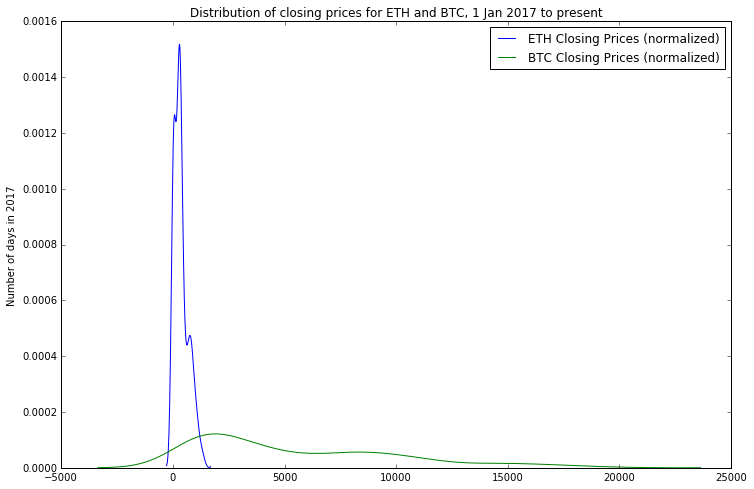

In [26]:
plt.figure(figsize=(12,8));
plt.title("Distribution of closing prices for ETH and BTC, 1 Jan 2017 to present");
plt.ylabel("Number of days in 2017");
sns.kdeplot(data=eth.Close);
sns.kdeplot(data=btc.Close);
plt.legend(["ETH Closing Prices", "BTC Closing Prices"]);
plt.show();

In [16]:
from matplotlib import dates

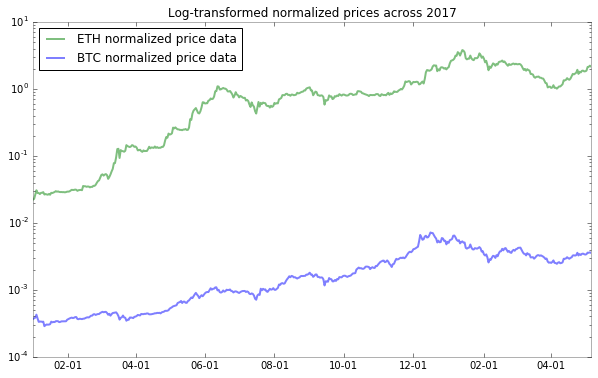

In [25]:
fig, ax = plt.subplots(1)
fig.set_figwidth(10)
fig.set_figheight(6)

ax.set_title("Log-transformed normalized prices across 2017")

hfmt = dates.DateFormatter('%m-%d')
ax.xaxis.set_major_formatter(hfmt)
ax.xaxis_date()
ax.plot(list(eth.Date), eth.Close/eth.Close.mean(), '-g', linewidth=2, alpha=0.5, 
        label = "ETH normalized price data");
ax.plot(list(btc.Date), btc.Close/btc.Close.sum(), '-b', linewidth=2, alpha=0.5, 
       label = "BTC normalized price data");
ax.semilogy()
ax.legend(loc = 0)

for loc, spine in ax.spines.items():
    spine.set_alpha(.3)

### Discussion
To my surprise, in terms of price gains/losses relative to the sum of coin values across 2017, LTC appears to be even more unstable than BTC, and the daily motions of their gains/losses seem only broadly correlated. That said, the year-long relative (normalized to the sum of prices across the year, which in this case works because so much of rhe price growth has only occurred this year) trajectory is unmistakable--massive growth, particularly in the month of December, when LTC and BTC trading values exploded in a sudden rush.

LTC in particular has seen much of its rise in value occur in a very short time, shorter than that of BTC (BTC is green, not blue, if you didn't notice), and what rises quickly as generally more likely to fall as quickly. The comparatively gradual rise of BTC's value may point to greater underlying value, but then again, cryptocurrencies are uncharted territory. 